In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math
import h5py

from Bio import SeqIO
import seaborn as sns



In [4]:
PUL_embeddings = []
PUL_keys = []
with h5py.File('C:\\Users\\alpha\\Documents\\jennifer\\maths\\SRIM\\code\\PUL.h5', 'r') as f:
    for key in f.keys():
      PUL_embeddings.append(f[key][()])
      PUL_keys.append(key)

In [32]:
f_path = 'C:\\Users\\alpha\\OneDrive - University of Cambridge\\BACKUP 14-04-22\\docs\\Maths\\SRIM\\code\\PUL.faa'
PUL_array, PUL_keys2 = [], []
with open(f_path, mode='r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):
        identifier, description = record.id, record.description
        PUL_keys2.append(identifier)
        if 'CAZyme' in description:
            PUL_array.append(1)
        else:
            PUL_array.append(0)
PUL_array = np.array(PUL_array)
PUL_array = PUL_array.reshape(np.shape(PUL_array)[0],-1)
PUL_array_df = pd.DataFrame(PUL_array, index=PUL_keys2,columns=['cazy'])

col_label=['emb'+str(i) for i in range(len(list(PUL_embeddings)[0]))]

PUL_embeddings_list=list(PUL_embeddings)
temp_df = pd.DataFrame(PUL_embeddings_list, index=PUL_keys, columns=['emb'+str(i) for i in range(len(list(PUL_embeddings)[0]))])

PUL_df = temp_df.join(PUL_array_df)

In [43]:
sum(np.array(PUL_df.iloc[0:15,-1]))

6

In [5]:
from Bio import SeqIO
import seaborn as sns
f_path = 'C:\\Users\\alpha\\Documents\\jennifer\\maths\\SRIM\\code\\diamond-windows\\jennifer_genomes.nr.fasta'

with open(f_path, mode='r') as handle:
    ind=0
    for record in SeqIO.parse(handle, 'fasta'):
        ind=ind+1

In [3]:
ind

760729

In [6]:
# matches_df = pd.read_csv('C:\\Users\\alpha\\Documents\\jennifer\\maths\\SRIM\\code\\diamond-windows\\matches.tsv',header=None, sep='\t')
matches_df = pd.read_csv('C:\\Users\\alpha\\Documents\\jennifer\\maths\\SRIM\\code\\diamond-windows\\matches.tsv',names=['qid', 'sid', 'pident', 'qlength', 'qstart', 'qend', 'slength', 'sstart', 'send', 'evalue', 'bitscore'], sep='\t')


In [7]:
matches_df

,qid,sid,pident,qlength,qstart,qend,slength,sstart,send,evalue,bitscore
0,accn|CP129981_1,PUL0121_8,37.1,669,4,657,667,10,666,2.570000e-126,387.0
1,accn|CP129981_2,PUL0106_2,30.9,190,40,162,174,41,159,1.610000e-07,47.4
2,accn|CP129981_7,PUL0269_4,33.3,117,13,114,124,17,122,1.970000e-11,55.1
3,accn|CP129981_9,PUL0460_101,28.8,162,10,160,166,8,159,1.190000e-19,79.0
4,accn|CP129981_9,PUL0460_102,24.6,162,12,149,154,18,151,5.760000e-10,53.1
...,...,...,...,...,...,...,...,...,...,...,...
1839472,accn|JAUDZE010000025_2,PUL0184_16,33.3,260,1,253,272,7,264,2.190000e-39,136.0
1839473,accn|JAUDZE010000025_2,PUL0339_2,31.0,260,84,251,271,88,257,4.590000e-21,87.8
1839474,accn|JAUDZE010000025_2,PUL0302_11,32.5,260,90,251,297,104,272,4.880000e-21,88.2
1839475,accn|JAUDZE010000025_2,PUL0468_19,27.9,260,93,251,239,67,229,4.380000e-10,56.6


### Histogram of no. cazymes in each PUL:
- `caz_res` = no. cazymes in each PUL
- `caz_res_frac` = proportion cazymes in each PUL
- `caz_res_len` = total no. proteins in each PUL

In [42]:
#need to find way of grouping proteins in the same PUL
#y-axis: count
#x-axis: frequency of cazymes in one PUL
test_list=PUL_keys
def util_func(x, y): return x[0] == y[0]

res = []
for sub in test_list:
    ele = sub.split('_')
    ele_cat = next((x for x in res if util_func(ele,str(x[0]).split('_'))), [])
    if ele_cat == []:
        res.append(ele_cat)
    ele_cat.append(sub)

print("list after categorisation : " + str(res))
len(res) # PUL0076 is missing!

The original list : ['PUL0001_1', 'PUL0001_10', 'PUL0001_11', 'PUL0001_12', 'PUL0001_13', 'PUL0001_14', 'PUL0001_15', 'PUL0001_2', 'PUL0001_3', 'PUL0001_4', 'PUL0001_5', 'PUL0001_6', 'PUL0001_7', 'PUL0001_8', 'PUL0001_9', 'PUL0002_1', 'PUL0002_2', 'PUL0003_1', 'PUL0003_2', 'PUL0004_1', 'PUL0004_2', 'PUL0005_1', 'PUL0005_2', 'PUL0006_1', 'PUL0006_10', 'PUL0006_11', 'PUL0006_2', 'PUL0006_3', 'PUL0006_4', 'PUL0006_5', 'PUL0006_6', 'PUL0006_7', 'PUL0006_8', 'PUL0006_9', 'PUL0007_1', 'PUL0007_2', 'PUL0007_3', 'PUL0007_4', 'PUL0007_5', 'PUL0007_6', 'PUL0007_7', 'PUL0007_8', 'PUL0008_1', 'PUL0008_10', 'PUL0008_11', 'PUL0008_12', 'PUL0008_2', 'PUL0008_3', 'PUL0008_4', 'PUL0008_5', 'PUL0008_6', 'PUL0008_7', 'PUL0008_8', 'PUL0008_9', 'PUL0009_1', 'PUL0009_10', 'PUL0009_11', 'PUL0009_12', 'PUL0009_13', 'PUL0009_14', 'PUL0009_15', 'PUL0009_2', 'PUL0009_3', 'PUL0009_4', 'PUL0009_5', 'PUL0009_6', 'PUL0009_7', 'PUL0009_8', 'PUL0009_9', 'PUL0010_1', 'PUL0010_10', 'PUL0010_11', 'PUL0010_12', 'PUL0010_1

601

In [54]:
ind=0
caz_res=[]

for i in range(len(res)):
    indtemp=ind
    caz_res.append(sum(np.array(PUL_df.iloc[indtemp:indtemp+len(res[i]),-1])))
    ind=indtemp+len(res[i])

print(caz_res)


15
2
2
2
2
11
8
12
15
42
4
11
56
9
4
5
9
13
6
16
16
6
5
12
11
8
5
14
24
12
3
3
6
2
5
22
8
8
3
6
3
5
23
34
11
16
25
3
29
20
6
10
8
9
7
5
13
5
13
24
35
19
16
12
13
13
11
4
22
36
38
22
22
36
25
11
6
16
12
13
6
12
12
3
3
2
8
2
12
8
10
24
25
17
22
15
12
3
6
19
25
31
33
36
22
27
27
28
28
3
27
23
14
7
2
22
7
2
6
36
6
37
33
6
8
12
24
12
11
12
8
14
29
21
26
3
7
12
11
4
5
12
12
27
23
30
15
10
14
12
8
3
3
8
2
2
4
2
33
26
13
21
19
17
5
12
9
9
7
7
9
20
3
4
6
15
14
15
19
19
12
15
19
12
7
7
10
17
15
11
27
30
6
5
10
7
13
17
13
13
19
7
7
6
8
7
3
9
13
9
8
4
9
4
10
7
24
7
11
10
7
9
16
36
13
12
10
8
12
2
6
5
7
20
13
12
8
17
11
7
9
12
9
11
11
18
19
12
30
7
6
32
28
16
19
15
10
24
15
17
12
5
29
2
15
10
5
16
15
4
3
5
12
8
9
5
6
6
15
28
7
6
3
6
16
6
5
12
12
10
14
12
12
9
4
9
10
13
14
10
22
9
7
17
7
6
5
12
6
4
2
3
6
4
15
3
3
4
19
6
20
6
17
6
13
6
10
25
28
6
19
22
23
31
25
29
34
24
37
43
5
39
11
31
15
13
13
3
21
4
6
11
8
8
9
3
4
5
6
6
4
3
8
8
13
3
30
11
5
5
3
5
3
19
9
27
20
10
12
6
11
5
12
12
11
7
9
8
24
15
8
10

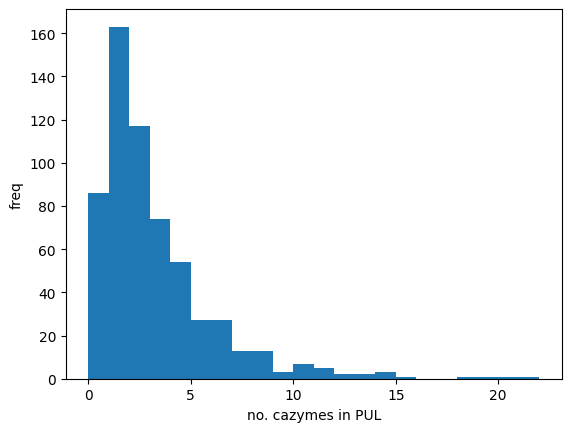

In [60]:
# fig, ax = plt.subplots()
# n, bins, patches = ax.hist(caz_res) #, bins=100, norm=LogNorm())
# plt.plot#(bins, y, '--', color ='black')
# # ax.set_facecolor((0, 0, 0))
# plt.xlabel('no. cazymes in PUL'), plt.ylabel('freq')
# plt.show()

plt.hist(caz_res, bins = range(min(caz_res),max(caz_res)+1))
plt.xlabel('no. cazymes in PUL'), plt.ylabel('freq')
plt.show()


Histogram of proportion cazymes in each PUL:

In [61]:
ind=0
caz_res_frac=[]
for i in range(len(res)):
    indtemp=ind
    caz_res_frac.append((sum(np.array(PUL_df.iloc[indtemp:indtemp+len(res[i]),-1])))/len(res[i]))
    ind=indtemp+len(res[i])

print(caz_res_frac)

[0.4, 0.5, 1.0, 0.5, 1.0, 0.09090909090909091, 0.25, 0.25, 0.2, 0.19047619047619047, 1.0, 0.2727272727272727, 0.19642857142857142, 0.2222222222222222, 0.25, 0.2, 0.1111111111111111, 0.23076923076923078, 0.16666666666666666, 0.1875, 0.125, 0.16666666666666666, 0.2, 0.0, 0.0, 0.125, 0.2, 0.21428571428571427, 0.3333333333333333, 0.0, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666, 0.5, 0.2, 0.09090909090909091, 0.125, 0.25, 0.3333333333333333, 0.8333333333333334, 0.3333333333333333, 0.2, 0.043478260869565216, 0.4411764705882353, 0.36363636363636365, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.2, 0.25, 0.2222222222222222, 0.2857142857142857, 0.4, 0.0, 0.6, 0.07692307692307693, 0.16666666666666666, 0.17142857142857143, 0.21052631578947367, 0.5, 0.3333333333333333, 0.46153846153846156, 0.46153846153846156, 0.5454545454545454, 0.5, 0.09090909090909091, 0.16666666666666666, 0.13157894736842105, 0.09090909090909091, 0.045454545454545456, 0.0, 0.12, 0.1818181818181

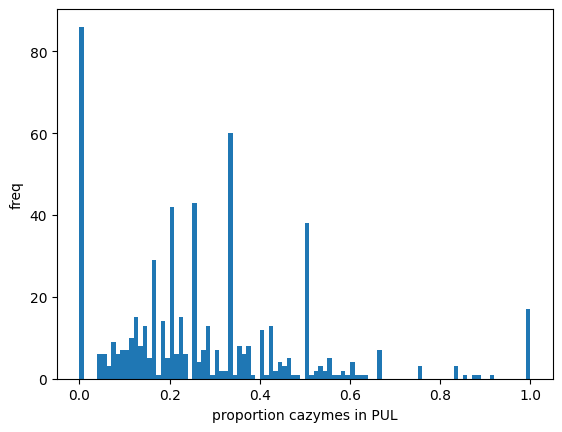

In [67]:
plt.hist(caz_res_frac, bins = 100)
plt.xlabel('proportion cazymes in PUL'), plt.ylabel('freq')
plt.show()

- largest spike at 0 - expected, since most of the PULs do not contain cazymes
- spikes at ~0.33, 0.5 and 1 - could be due to PULs containing only few (1-3) proteins? (histogram of PUL length?)
- mostly <0.5

Histogram of length of PULs: 

(-is 'length' the correct word?)

[15, 2, 2, 2, 2, 11, 8, 12, 15, 42, 4, 11, 56, 9, 4, 5, 9, 13, 6, 16, 16, 6, 5, 12, 11, 8, 5, 14, 24, 12, 3, 3, 6, 2, 5, 22, 8, 8, 3, 6, 3, 5, 23, 34, 11, 16, 25, 3, 29, 20, 6, 10, 8, 9, 7, 5, 13, 5, 13, 24, 35, 19, 16, 12, 13, 13, 11, 4, 22, 36, 38, 22, 22, 36, 25, 11, 6, 16, 12, 13, 6, 12, 12, 3, 3, 2, 8, 2, 12, 8, 10, 24, 25, 17, 22, 15, 12, 3, 6, 19, 25, 31, 33, 36, 22, 27, 27, 28, 28, 3, 27, 23, 14, 7, 2, 22, 7, 2, 6, 36, 6, 37, 33, 6, 8, 12, 24, 12, 11, 12, 8, 14, 29, 21, 26, 3, 7, 12, 11, 4, 5, 12, 12, 27, 23, 30, 15, 10, 14, 12, 8, 3, 3, 8, 2, 2, 4, 2, 33, 26, 13, 21, 19, 17, 5, 12, 9, 9, 7, 7, 9, 20, 3, 4, 6, 15, 14, 15, 19, 19, 12, 15, 19, 12, 7, 7, 10, 17, 15, 11, 27, 30, 6, 5, 10, 7, 13, 17, 13, 13, 19, 7, 7, 6, 8, 7, 3, 9, 13, 9, 8, 4, 9, 4, 10, 7, 24, 7, 11, 10, 7, 9, 16, 36, 13, 12, 10, 8, 12, 2, 6, 5, 7, 20, 13, 12, 8, 17, 11, 7, 9, 12, 9, 11, 11, 18, 19, 12, 30, 7, 6, 32, 28, 16, 19, 15, 10, 24, 15, 17, 12, 5, 29, 2, 15, 10, 5, 16, 15, 4, 3, 5, 12, 8, 9, 5, 6, 6, 15, 2

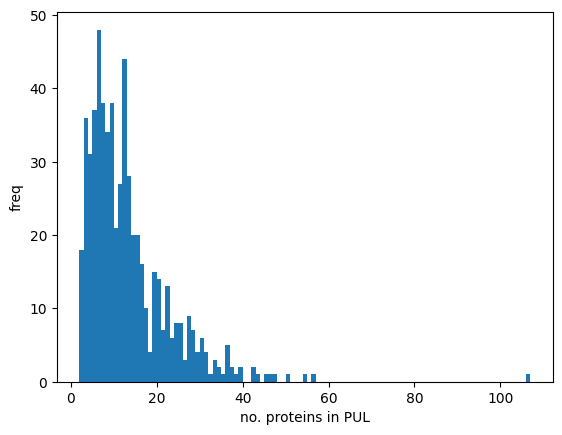

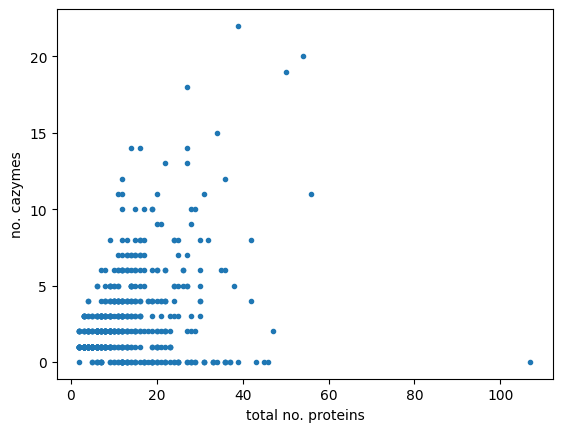

In [72]:
caz_res_len=[]
for i in range(len(res)):
    caz_res_len.append(len(res[i]))
print(caz_res_len)

plt.hist(caz_res_len, bins = range(min(caz_res_len),max(caz_res_len)+1))
plt.xlabel('no. proteins in PUL'), plt.ylabel('freq')
plt.show()

plt.scatter(caz_res_len, caz_res, marker='.')
plt.xlabel('total no. proteins'), plt.ylabel('no. cazymes')
plt.show()


Columns: qid, sid, pident, qlength, qstart, qend, slength, sstart, send, evalue, bitscore

### Scatter plot of pident vs evalue:

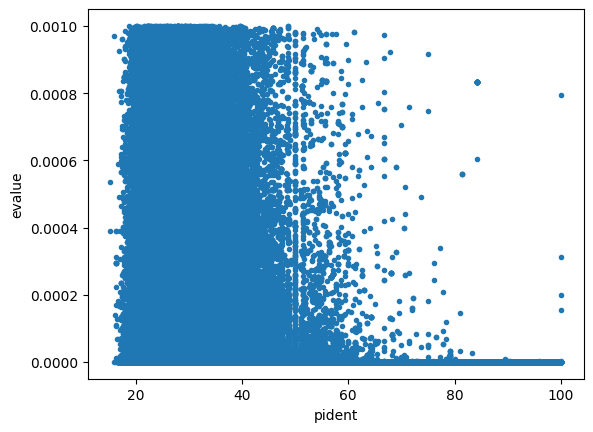

In [7]:
plt.scatter(np.array(matches_df.iloc[:,2]), np.array(matches_df.iloc[:,9]), marker='.')
plt.xlabel('pident')
plt.ylabel('evalue')
plt.show()

Histogram of percentage identity (pident):

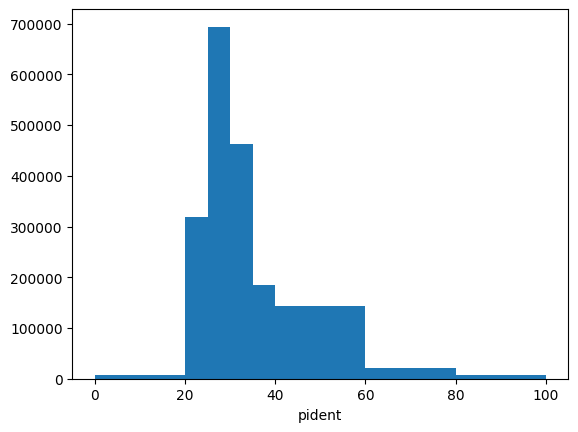

In [58]:
plt.hist(np.array(matches_df.iloc[:,2]), bins=[0,20,25,30,35,40,60,80,100])
plt.xlabel('pident')
plt.show()

Histogram of E-value:

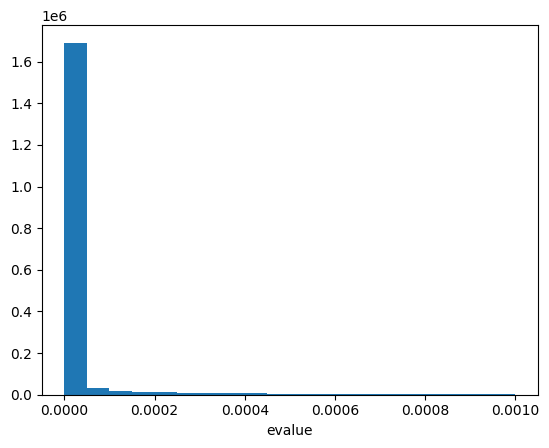

In [30]:
plt.hist(np.array(matches_df.iloc[:,9]), bins=20)
plt.xlabel('evalue')
plt.show()

Instead try histogram of log E-value:

C:\Users\alpha\AppData\Local\Temp\ipykernel_17496\118638036.py:1: RuntimeWarning: divide by zero encountered in log
  plt.hist(np.log(np.array(matches_df.iloc[:,9])), bins=100, range=[-400,0])


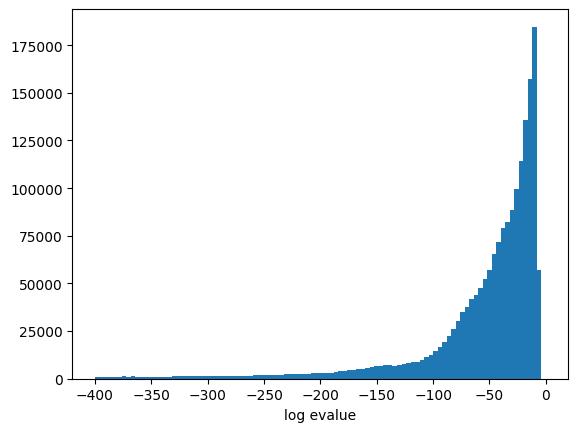

In [10]:
plt.hist(np.log(np.array(matches_df.iloc[:,9])), bins=100, range=[-400,0])
plt.xlabel('log evalue')
plt.show()

(translated) log log histogram instead? or polynomial scale?

## E-value vs pident:

In [40]:
x=np.array(matches_df.iloc[:,2])
y=np.array(matches_df.iloc[:,9])
log_y = np.log(y)

C:\Users\alpha\AppData\Local\Temp\ipykernel_17496\2839966634.py:3: RuntimeWarning: divide by zero encountered in log
  log_y = np.log(y)


### 2D histogram:

(Text(0.5, 0, 'pident'), Text(0, 0.5, 'evalue'))

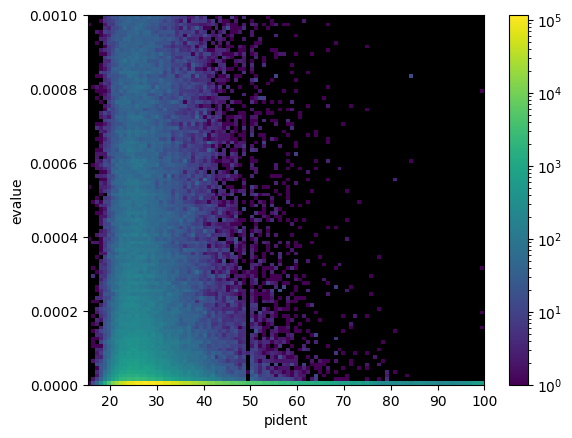

In [69]:
fig, ax = plt.subplots()
counts, xedges, yedges, im = ax.hist2d(x, y, bins=100, norm=LogNorm())
fig.colorbar(im, ax=ax)
ax.set_facecolor((0, 0, 0))
plt.xlabel('pident'), plt.ylabel('evalue')


Similarly to above, try log evalue scale instead:

(Text(0.5, 0, 'pident'), Text(0, 0.5, 'log evalue'))

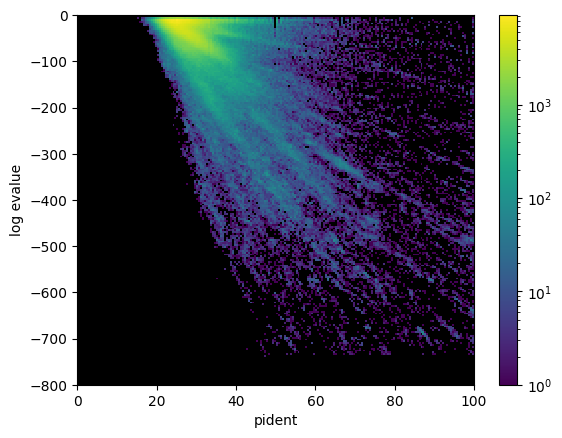

In [73]:
fig, ax = plt.subplots()
counts, xedges, yedges, im = ax.hist2d(x, log_y, bins=200, norm=LogNorm(), range=[[0,100],[-800,0]])
fig.colorbar(im)
ax.set_facecolor((0, 0, 0))
plt.xlabel('pident'), plt.ylabel('log evalue')

- high density in top left corner - as expected; ORFs with low % identity to the PULs are not expected to be significant

- slight negative correlation?

- why/significance of radial streaks from top left corner? (roughly linear - why/what does this suggest) 

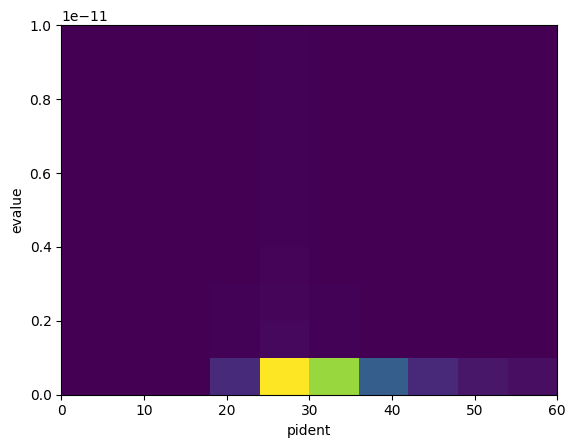

In [32]:
plt.hist2d(x,y,bins=[10,10], range=[[0,60],[0,0.1e-10]])
plt.xlabel('pident'), plt.ylabel('evalue')
plt.show()

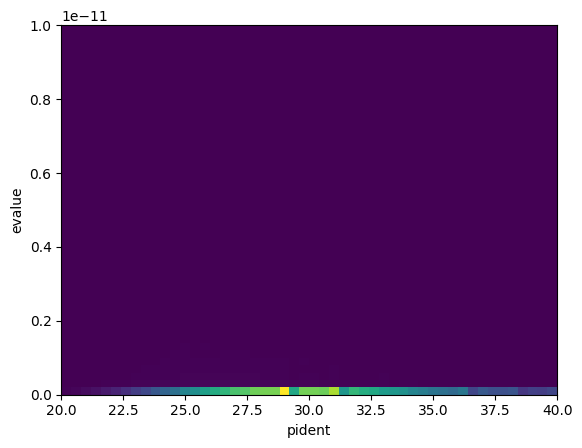

In [12]:
plt.hist2d(np.array(matches_df.iloc[:,2]),np.array(matches_df.iloc[:,9]),bins=[50,50], range=[[20,40],[0,0.1e-10]])
plt.xlabel('pident'), plt.ylabel('evalue')
plt.show()

In [13]:
np.array(matches_df.iloc[:,9])

array([2.57e-126, 1.61e-007, 1.97e-011, ..., 4.88e-021, 4.38e-010,
       8.73e-007])

## E-value vs coverage:

In [78]:
coverage_arr = np.divide((np.array(matches_df.iloc[:,5])-np.array(matches_df.iloc[:,4])), np.array(matches_df.iloc[:,6]))

x=coverage_arr
y=np.array(matches_df.iloc[:,9])
log_y = np.log(y)

C:\Users\alpha\AppData\Local\Temp\ipykernel_38396\3850308559.py:5: RuntimeWarning: divide by zero encountered in log
  log_y = np.log(y)


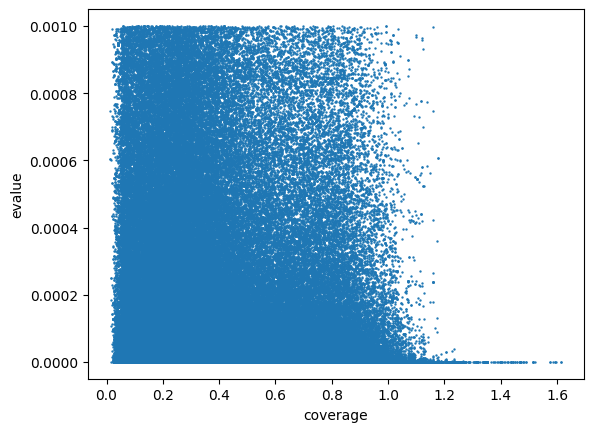

In [75]:
plt.scatter(coverage_arr,y,marker='.',s=2)
plt.xlabel('coverage'), plt.ylabel('evalue')
# plt.figure(figsize=(15,12))
plt.show()

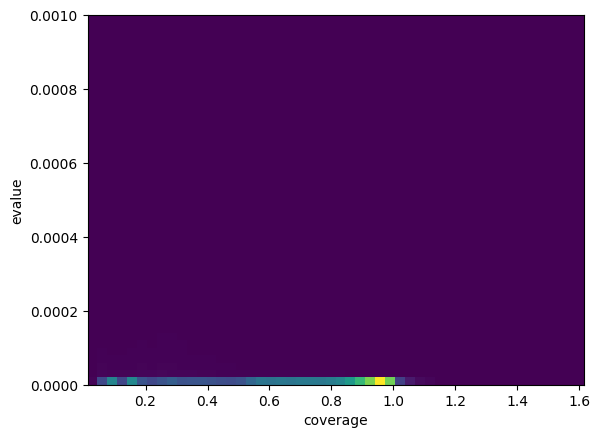

In [76]:

plt.hist2d(coverage_arr,y,bins=[50,50])
plt.xlabel('coverage'), plt.ylabel('evalue')
plt.show()

(Text(0.5, 0, 'coverage'), Text(0, 0.5, 'log evalue'))

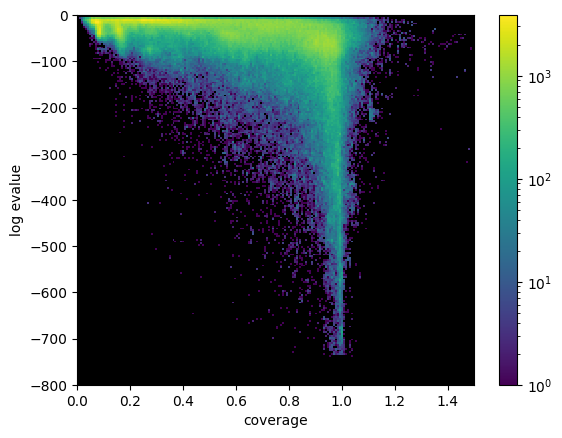

In [82]:
fig, ax = plt.subplots()
counts, xedges, yedges, im = ax.hist2d(x, log_y, bins=200, norm=LogNorm(), range=[[0,1.5],[-800,0]])
fig.colorbar(im)
ax.set_facecolor((0, 0, 0))
plt.xlabel('coverage'), plt.ylabel('log evalue')

## ORFs with no homology to the PULs:

ie not included in the ultra sensitive search (matches.tsv)

In [78]:
id_array_matches = np.array(matches_df.iloc[:,0])  

In [79]:
id_array_all = []

f_path = 'C:\\Users\\alpha\\Documents\\jennifer\\maths\\SRIM\\code\\diamond-windows\\jennifer_genomes.nr.fasta'
with open(f_path, mode='r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):
        identifier = record.id
        id_array_all.append(identifier)

In [85]:
non_puls_list = list(set(id_array_all) - set(id_array_matches))

In [87]:
len(id_array_all)

760729

In [89]:
len(set(id_array_matches))

209420

In [86]:
len(non_puls_list)

551309

# not sure what to do with this